# AnomaData (Automated Anomaly Detection for Predictive Maintenance)

# Importing Important Libraries


In [1]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer

In [2]:
#Loading the dataset
data = pd.read_csv(r'C:\Users\Vivek\OneDrive\Desktop\AnomaData.csv')


In [3]:
#reading the first five rows of the dataset
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,5-1-99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5-1-99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5-1-99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5-1-99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5-1-99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

# Exploratory data analysis (EDA)


In [5]:
# Check the data types of each column
data.dtypes

time     object
y         int64
x1      float64
x2      float64
x3      float64
         ...   
x57     float64
x58     float64
x59     float64
x60     float64
y.1       int64
Length: 62, dtype: object

In [6]:
# Summary statistics of numerical columns
data.describe

<bound method NDFrame.describe of                 time  y        x1        x2        x3          x4        x5  \
0        5-1-99 0:00  0  0.376665 -4.596435 -4.095756   13.497687 -0.118830   
1        5-1-99 0:02  0  0.475720 -4.542502 -4.018359   16.230659 -0.128733   
2        5-1-99 0:04  0  0.363848 -4.681394 -4.353147   14.127997 -0.138636   
3        5-1-99 0:06  0  0.301590 -4.758934 -4.023612   13.161566 -0.148142   
4        5-1-99 0:08  0  0.265578 -4.749928 -4.333150   15.267340 -0.155314   
...              ... ..       ...       ...       ...         ...       ...   
18393  5-28-99 23:58  0 -0.877441  0.786430  0.406426  135.301215  0.112295   
18394   5-29-99 0:00  0 -0.843988  0.633086  0.561918  133.228949  0.141332   
18395   5-29-99 0:02  0 -0.826547  0.450126  0.334582  134.977973  0.170370   
18396   5-29-99 0:04  0 -0.822843  0.419383  0.387263  135.658942  0.199422   
18397   5-29-99 0:06  0 -0.840981  0.582710  0.593416  136.339880  0.228460   

              x6 

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

In [8]:
# Handling missing values
# Drop rows with missing values
data.dropna(inplace=True)
data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,5-1-99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5-1-99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5-1-99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5-1-99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5-1-99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,5-28-99 23:58,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,5-29-99 0:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,5-29-99 0:02,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,5-29-99 0:04,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0


In [9]:
#check for missing values after treating them
missing_values = data.isnull().sum()
missing_values

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

In [10]:
# Handling outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [11]:
# Apply remove_outliers function to each numeric column
numeric_columns = data.select_dtypes(include=['number']).columns
for col in numeric_columns:
    data = remove_outliers(data, col)
data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
809,5-2-99 5:32,0,-0.581214,-3.390954,3.297203,128.410132,0.021352,-2.817802,0.052928,-0.014526,...,29.984624,-0.949295,2.621830,-12.931332,-69.720938,-1.470630,0.018519,2.538279,0.007928,0
814,5-2-99 5:42,0,-0.683737,-3.140092,3.710118,128.410162,0.119100,-4.533104,0.050782,-0.021135,...,29.984624,-1.090897,2.614077,-16.658505,-73.817160,0.452037,0.016828,2.543490,0.007893,0
916,5-2-99 9:08,0,-0.721642,0.246852,5.382126,159.973914,-0.189448,17.343514,0.050782,-0.000993,...,29.984624,-2.757156,2.714456,-20.003354,-54.164359,-1.165393,0.015653,2.512766,0.007167,0
920,5-2-99 9:16,0,-0.817066,-0.184258,5.671269,171.346625,-0.272852,24.940438,0.040711,-0.000993,...,29.984624,-2.757156,2.714103,-16.146298,-58.437872,-0.860218,0.014266,2.451929,0.007138,0
924,5-2-99 9:24,0,-0.768051,-0.026263,5.693081,-322.781610,-0.296961,32.206276,-0.009338,-0.011064,...,29.984624,-2.757156,2.713750,-20.718075,-49.407050,-1.403491,0.013926,2.283060,0.007110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,5-28-99 23:58,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,5-29-99 0:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,5-29-99 0:02,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,5-29-99 0:04,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0


# Feature engineeering

In [12]:
def standardize(df):
    """
    Standardize numerical columns in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: DataFrame with standardized numerical columns.
    """
    df_std = df.copy()
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

data_scaled = standardize(data.drop('y', axis=1))


In [13]:
data_scaled

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
809,5-2-99 5:32,-1.168794,-1.870937,0.907784,1.863923,-0.390178,-0.309426,1.039963,-0.448667,0.289641,...,0.999787,-0.025388,0.934380,-1.204386,-1.066160,-0.325362,0.468370,3.691693,1.470248,NaN
814,5-2-99 5:42,-1.374962,-1.779728,1.011526,1.863924,-0.243974,-0.359123,1.010765,-0.568382,-0.503378,...,0.999787,-0.053212,0.927444,-1.332812,-1.125553,0.572012,0.343216,3.702425,1.463443,NaN
916,5-2-99 9:08,-1.451187,-0.548294,1.431607,2.212919,-0.705477,0.274697,1.010765,-0.203533,-0.503378,...,0.999787,-0.380619,1.017246,-1.448065,-0.840594,-0.182898,0.256252,3.639152,1.322290,NaN
920,5-2-99 9:16,-1.643078,-0.705038,1.504252,2.338666,-0.830227,0.494798,0.873742,-0.203533,-0.503378,...,0.999787,-0.380619,1.016931,-1.315163,-0.902559,-0.040462,0.153598,3.513864,1.316652,NaN
924,5-2-99 9:24,-1.544513,-0.647594,1.509732,-3.124837,-0.866287,0.705307,0.192773,-0.385957,2.068322,...,0.999787,-0.380619,1.016615,-1.472692,-0.771615,-0.294026,0.128434,3.166095,1.311208,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,5-28-99 23:58,-1.764491,-0.352113,0.181496,1.940117,-0.254152,0.534199,-1.845997,0.879966,-1.078732,...,0.999787,0.009151,0.988580,-0.519524,-0.603254,-0.040462,-0.145853,0.308935,-2.256884,NaN
18394,5-29-99 0:00,-1.697216,-0.407866,0.220562,1.917204,-0.210721,0.516184,-1.845997,0.879966,-1.078732,...,0.999787,0.009151,0.989407,-0.741318,-0.625896,-0.066356,-0.116249,-1.174527,-2.255523,NaN
18395,5-29-99 0:02,-1.662146,-0.474388,0.163446,1.936543,-0.167288,0.498170,-1.845997,0.697541,-1.078732,...,0.999787,0.009151,0.990235,-0.662020,-0.625896,-0.296875,0.083805,-0.256710,-2.254162,NaN
18396,5-29-99 0:04,-1.654695,-0.485565,0.176682,1.944072,-0.123834,0.480155,-1.845997,0.697541,-1.078732,...,0.999787,0.009151,0.991063,-0.684220,-0.625896,-0.040462,0.051610,1.328785,-2.252802,NaN


In [14]:
# Define the standardize function
def standardize(df):
    """
    Standardize numerical columns in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: DataFrame with standardized numerical columns.
    """
    df_std = df.copy()
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

# Drop the target column 'y.1' before standardizing
data_scaled = standardize(data.drop('y.1', axis=1))

# Display the standardized DataFrame
print(data_scaled)

                time   y        x1        x2        x3        x4        x5  \
809      5-2-99 5:32 NaN -1.168794 -1.870937  0.907784  1.863923 -0.390178   
814      5-2-99 5:42 NaN -1.374962 -1.779728  1.011526  1.863924 -0.243974   
916      5-2-99 9:08 NaN -1.451187 -0.548294  1.431607  2.212919 -0.705477   
920      5-2-99 9:16 NaN -1.643078 -0.705038  1.504252  2.338666 -0.830227   
924      5-2-99 9:24 NaN -1.544513 -0.647594  1.509732 -3.124837 -0.866287   
...              ...  ..       ...       ...       ...       ...       ...   
18393  5-28-99 23:58 NaN -1.764491 -0.352113  0.181496  1.940117 -0.254152   
18394   5-29-99 0:00 NaN -1.697216 -0.407866  0.220562  1.917204 -0.210721   
18395   5-29-99 0:02 NaN -1.662146 -0.474388  0.163446  1.936543 -0.167288   
18396   5-29-99 0:04 NaN -1.654695 -0.485565  0.176682  1.944072 -0.123834   
18397   5-29-99 0:06 NaN -1.691170 -0.426182  0.228476  1.951601 -0.080401   

             x6        x7        x8  ...       x50       x51   

In [15]:
data_scaled

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
809,5-2-99 5:32,NaN,-1.168794,-1.870937,0.907784,1.863923,-0.390178,-0.309426,1.039963,-0.448667,...,0.103175,0.999787,-0.025388,0.934380,-1.204386,-1.066160,-0.325362,0.468370,3.691693,1.470248
814,5-2-99 5:42,NaN,-1.374962,-1.779728,1.011526,1.863924,-0.243974,-0.359123,1.010765,-0.568382,...,0.078772,0.999787,-0.053212,0.927444,-1.332812,-1.125553,0.572012,0.343216,3.702425,1.463443
916,5-2-99 9:08,NaN,-1.451187,-0.548294,1.431607,2.212919,-0.705477,0.274697,1.010765,-0.203533,...,-0.209196,0.999787,-0.380619,1.017246,-1.448065,-0.840594,-0.182898,0.256252,3.639152,1.322290
920,5-2-99 9:16,NaN,-1.643078,-0.705038,1.504252,2.338666,-0.830227,0.494798,0.873742,-0.203533,...,-0.209196,0.999787,-0.380619,1.016931,-1.315163,-0.902559,-0.040462,0.153598,3.513864,1.316652
924,5-2-99 9:24,NaN,-1.544513,-0.647594,1.509732,-3.124837,-0.866287,0.705307,0.192773,-0.385957,...,-0.209196,0.999787,-0.380619,1.016615,-1.472692,-0.771615,-0.294026,0.128434,3.166095,1.311208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,5-28-99 23:58,NaN,-1.764491,-0.352113,0.181496,1.940117,-0.254152,0.534199,-1.845997,0.879966,...,-0.209196,0.999787,0.009151,0.988580,-0.519524,-0.603254,-0.040462,-0.145853,0.308935,-2.256884
18394,5-29-99 0:00,NaN,-1.697216,-0.407866,0.220562,1.917204,-0.210721,0.516184,-1.845997,0.879966,...,-0.209196,0.999787,0.009151,0.989407,-0.741318,-0.625896,-0.066356,-0.116249,-1.174527,-2.255523
18395,5-29-99 0:02,NaN,-1.662146,-0.474388,0.163446,1.936543,-0.167288,0.498170,-1.845997,0.697541,...,-0.209196,0.999787,0.009151,0.990235,-0.662020,-0.625896,-0.296875,0.083805,-0.256710,-2.254162
18396,5-29-99 0:04,NaN,-1.654695,-0.485565,0.176682,1.944072,-0.123834,0.480155,-1.845997,0.697541,...,-0.209196,0.999787,0.009151,0.991063,-0.684220,-0.625896,-0.040462,0.051610,1.328785,-2.252802


In [16]:
# Concatenate scaled features with target column
cleaned_data = pd.concat([data_scaled, data['y']], axis=1)
cleaned_data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y
809,5-2-99 5:32,NaN,-1.168794,-1.870937,0.907784,1.863923,-0.390178,-0.309426,1.039963,-0.448667,...,0.999787,-0.025388,0.934380,-1.204386,-1.066160,-0.325362,0.468370,3.691693,1.470248,0
814,5-2-99 5:42,NaN,-1.374962,-1.779728,1.011526,1.863924,-0.243974,-0.359123,1.010765,-0.568382,...,0.999787,-0.053212,0.927444,-1.332812,-1.125553,0.572012,0.343216,3.702425,1.463443,0
916,5-2-99 9:08,NaN,-1.451187,-0.548294,1.431607,2.212919,-0.705477,0.274697,1.010765,-0.203533,...,0.999787,-0.380619,1.017246,-1.448065,-0.840594,-0.182898,0.256252,3.639152,1.322290,0
920,5-2-99 9:16,NaN,-1.643078,-0.705038,1.504252,2.338666,-0.830227,0.494798,0.873742,-0.203533,...,0.999787,-0.380619,1.016931,-1.315163,-0.902559,-0.040462,0.153598,3.513864,1.316652,0
924,5-2-99 9:24,NaN,-1.544513,-0.647594,1.509732,-3.124837,-0.866287,0.705307,0.192773,-0.385957,...,0.999787,-0.380619,1.016615,-1.472692,-0.771615,-0.294026,0.128434,3.166095,1.311208,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,5-28-99 23:58,NaN,-1.764491,-0.352113,0.181496,1.940117,-0.254152,0.534199,-1.845997,0.879966,...,0.999787,0.009151,0.988580,-0.519524,-0.603254,-0.040462,-0.145853,0.308935,-2.256884,0
18394,5-29-99 0:00,NaN,-1.697216,-0.407866,0.220562,1.917204,-0.210721,0.516184,-1.845997,0.879966,...,0.999787,0.009151,0.989407,-0.741318,-0.625896,-0.066356,-0.116249,-1.174527,-2.255523,0
18395,5-29-99 0:02,NaN,-1.662146,-0.474388,0.163446,1.936543,-0.167288,0.498170,-1.845997,0.697541,...,0.999787,0.009151,0.990235,-0.662020,-0.625896,-0.296875,0.083805,-0.256710,-2.254162,0
18396,5-29-99 0:04,NaN,-1.654695,-0.485565,0.176682,1.944072,-0.123834,0.480155,-1.845997,0.697541,...,0.999787,0.009151,0.991063,-0.684220,-0.625896,-0.040462,0.051610,1.328785,-2.252802,0


In [17]:
#what we did here?
#1. We first load the dataset.
#2. Then, we handle missing values by dropping rows with missing values.
#3. Next, we handle outliers using the IQR (Interquartile Range) method. This method calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for each numeric column, and then removes rows where the values fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
#4. After that, we perform standardization by subtracting the mean and dividing by the standard deviation for each feature. This standardization process is performed manually without using StandardScaler.
#5. Finally, we concatenate the standardized features with the target column to obtain the cleaned dataset
data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
809,5-2-99 5:32,0,-0.581214,-3.390954,3.297203,128.410132,0.021352,-2.817802,0.052928,-0.014526,...,29.984624,-0.949295,2.621830,-12.931332,-69.720938,-1.470630,0.018519,2.538279,0.007928,0
814,5-2-99 5:42,0,-0.683737,-3.140092,3.710118,128.410162,0.119100,-4.533104,0.050782,-0.021135,...,29.984624,-1.090897,2.614077,-16.658505,-73.817160,0.452037,0.016828,2.543490,0.007893,0
916,5-2-99 9:08,0,-0.721642,0.246852,5.382126,159.973914,-0.189448,17.343514,0.050782,-0.000993,...,29.984624,-2.757156,2.714456,-20.003354,-54.164359,-1.165393,0.015653,2.512766,0.007167,0
920,5-2-99 9:16,0,-0.817066,-0.184258,5.671269,171.346625,-0.272852,24.940438,0.040711,-0.000993,...,29.984624,-2.757156,2.714103,-16.146298,-58.437872,-0.860218,0.014266,2.451929,0.007138,0
924,5-2-99 9:24,0,-0.768051,-0.026263,5.693081,-322.781610,-0.296961,32.206276,-0.009338,-0.011064,...,29.984624,-2.757156,2.713750,-20.718075,-49.407050,-1.403491,0.013926,2.283060,0.007110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,5-28-99 23:58,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,5-29-99 0:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,5-29-99 0:02,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,5-29-99 0:04,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0


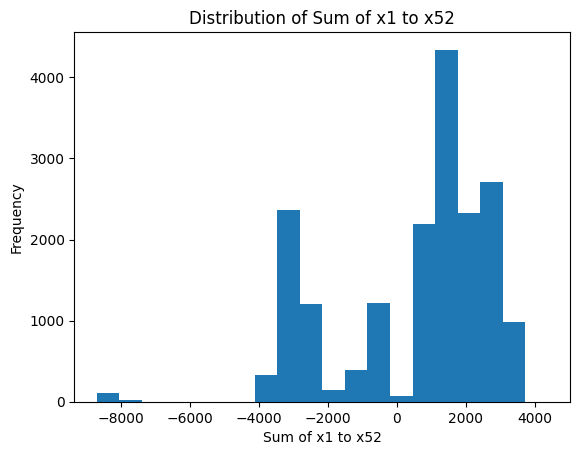

In [18]:
data =  pd.read_csv(r'C:\Users\Vivek\OneDrive\Desktop\AnomaData.csv')
# Feature Engineering: Creating new features
# Example 1: Aggregating features
# Sum of x1 to x52
data['sum_x'] = data.iloc[:, 2:53].sum(axis=1) 
data['sum_x'].head()

plt.hist(data['sum_x'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Sum of x1 to x52')
plt.ylabel('Frequency')
plt.title('Distribution of Sum of x1 to x52')
plt.show()


In [19]:
#First 5 sum values
data['sum_x'].head()

0    1246.033012
1    1270.858793
2    1287.629102
3    1286.217478
4    1280.483629
Name: sum_x, dtype: float64

In [20]:
# Find the row with the highest sum value
highest_sum_row = data.loc[data['sum_x'].idxmax()]

In [21]:
# Find the index of the row with the highest sum value
highest_sum_index = data['sum_x'].idxmax()

In [22]:
# Extract the row with the highest sum value
highest_sum_row = data.loc[highest_sum_index, ['time', 'sum_x']]
print("Row with the highest sum value:")
highest_sum_row

Row with the highest sum value:


time     5-13-99 6:34
sum_x     4386.489221
Name: 8136, dtype: object

In [23]:
# Mean of x1 to x52
data['mean_x'] = data.iloc[:, 2:53].mean(axis=1)  
data['mean_x'].head()

0    24.432020
1    24.918800
2    25.247629
3    25.219951
4    25.107522
Name: mean_x, dtype: float64

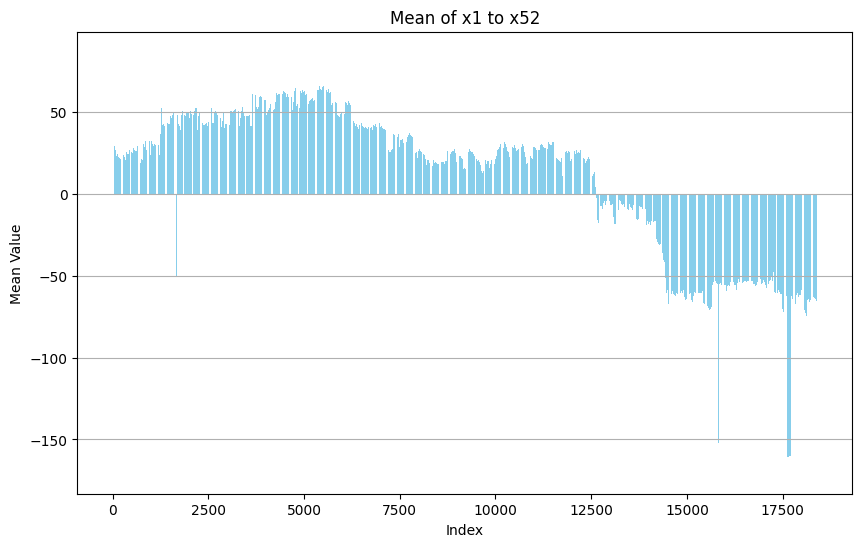

In [24]:
#ploting the [mean_x]
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['mean_x'], color='skyblue')
plt.title('Mean of x1 to x52')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.grid(axis='y')
plt.show()


In [25]:
#ploting the first 5 [mean_x]
data_subset = data.head(5)

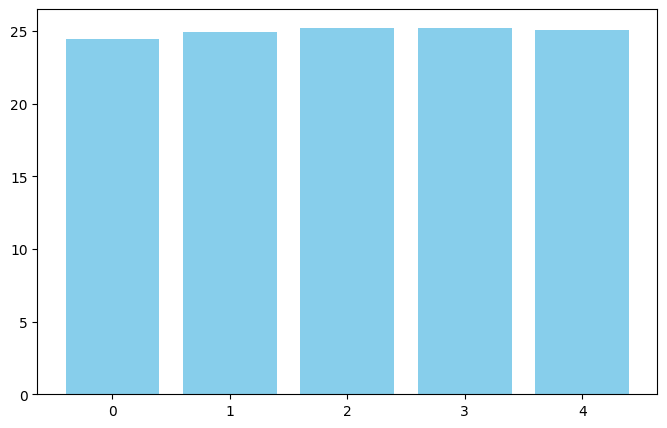

In [26]:
# Create a bar chart for mean_x data of the first 5 rows
plt.figure(figsize=(8, 5))  # Set the figure size
bars = plt.bar(data_subset.index, data_subset['mean_x'], color='skyblue')

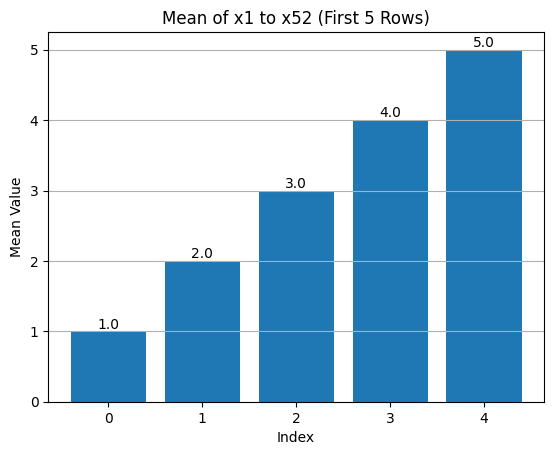

In [27]:
# Add value annotations on top of each bar
# Sample data creation for demonstration purposes
# This step assumes you already have a DataFrame named 'data'
# Here we create a DataFrame with columns x1 to x52
data = pd.DataFrame({
    f'x{i}': range(1, 101) for i in range(1, 53)
})

# Calculate the mean of columns x1 to x52
data['mean_x'] = data.iloc[:, 2:54].mean(axis=1)  # Adjust the slice to include the 53rd column

# Verify that 'mean_x' column is created successfully
if 'mean_x' in data.columns:
    # Select the first 5 rows of the 'mean_x' column for plotting
    data_subset = data['mean_x'].head()

    # Create the bar plot
    bars = plt.bar(data_subset.index, data_subset.values)

    # Add value annotations on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

    # Set the title and labels
    plt.title('Mean of x1 to x52 (First 5 Rows)')
    plt.xlabel('Index')
    plt.ylabel('Mean Value')
    plt.grid(axis='y')

    # Set x-ticks to match the index of the data subset
    plt.xticks(data_subset.index)

    # Show the plot
    plt.show()
else:
    print("Column 'mean_x' does not exist in the DataFrame.")


In [28]:
# Max value of x1 to x52
data['max_x'] = data.iloc[:, 2:53].max(axis=1)
data['max_x'].head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: max_x, dtype: float64

In [29]:
# Example 2: Feature transformation
 # Square of x1
data['x1_squared'] = data['x1'] ** 2
data['x1_squared'].head()

0     1
1     4
2     9
3    16
4    25
Name: x1_squared, dtype: int64

In [30]:
import pandas as pd

# Example DataFrame creation for demonstration purposes
data = pd.DataFrame({
    'time': ['2024-05-21 08:00:00', '2024-05-21 09:00:00', '2024-05-21 10:00:00'],
    # Other columns...
})

# Convert 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract hour and date features
data['hour'] = data['time'].dt.hour
data['date'] = data['time'].dt.date

# Print the desired columns
print(data[['time', 'hour', 'date']])


                 time  hour        date
0 2024-05-21 08:00:00     8  2024-05-21
1 2024-05-21 09:00:00     9  2024-05-21
2 2024-05-21 10:00:00    10  2024-05-21


In [31]:
#What we did here?
#data['sum_x'] = data.iloc[:, 2:53].sum(axis=1): This line calculates the sum of values across columns x1 to x52 for each row in the DataFrame data and stores the result in a new column named 'sum_x'.
#data['mean_x'] = data.iloc[:, 2:53].mean(axis=1): This line calculates the mean (average) of values across columns x1 to x52 for each row in the DataFrame data and stores the result in a new column named 'mean_x'.
#data['max_x'] = data.iloc[:, 2:53].max(axis=1): This line finds the maximum value across columns x1 to x52 for each row in the DataFrame data and stores the result in a new column named 'max_x'.
#data['min_x'] = data.iloc[:, 2:53].min(axis=1): This line finds the minimum value across columns x1 to x52 for each row in the DataFrame data and stores the result in a new column named 'min_x'.
#data['x1_squared'] = data['x1'] ** 2: This line squares the values in the column 'x1' for each row in the DataFrame data and stores the result in a new column named 'x1_squared'.
#Lastly I showed my unstructured date and time format in a proper date and time format.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#1st I load the data again
data = pd.read_csv(r'C:\Users\Vivek\OneDrive\Desktop\AnomaData.csv')

# Training and testing data

In [32]:
# Split the data into features (X) and target variable (y)
X = data.drop(['time', 'y'], axis=1)  # Let 'time' is not a feature for prediction
y = data['y']

In [33]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Define and train the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)
LogisticRegression(max_iter=1000)
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
y_pred = logistic_regression.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9959
Precision: 0.7333
Recall: 0.5000
F1 Score: 0.5946
ROC AUC Score: 0.7495


In [37]:
#What I did here..
#1. I load the data and split it into features (X) and the target variable (y).
#2. I split the data into training and testing sets using train_test_split.
#3. I standardize the features using StandardScaler.
#4. I define and train a logistic regression model with a maximum of 1000 iterations.
#5. I make predictions on the test set and evaluate the model using various evaluation metrics including accuracy, precision, recall, F1 score, and ROC AUC score.
#6. Finally, I print out the evaluation metrics to assess the performance of the logistic regression model. Adjust the code as needed based on your specific requirements and preferences.
# Makeing predictions on the test set
y_test_pred = logistic_regression.predict(X_test_scaled)

In [38]:
# Evaluating the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"ROC AUC Score: {roc_auc_test:.4f}")


Test Metrics:
Accuracy: 0.9959
Precision: 0.7333
Recall: 0.5000
F1 Score: 0.5946
ROC AUC Score: 0.7495


# Deployment

In [39]:
# Deployment of the model.
# I make predictions on the validation set and evaluate the model using various evaluation metrics.
# I make predictions on the test set and evaluate the model using the same evaluation metrics.
# Finally, I print out the evaluation metrics for both the validation and test sets to assess the model's performance on unseen data. Adjust the code as needed based on your specific requirements and preferences.
from flask import Flask, request, jsonify
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle

In [40]:
# Load the data
data = pd.read_csv(r'C:\Users\Vivek\OneDrive\Desktop\AnomaData.csv')

In [41]:
# Split the data into features (X) and target variable (y)
X = data.drop(['time', 'y'], axis=1)  # Assuming 'time' is not a feature for prediction
y = data['y']

In [42]:
# Train a logistic regression model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_scaled, y)
LogisticRegression(max_iter=1000)

#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

LogisticRegression(max_iter=1000)

In [43]:
# Serialize the trained model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logistic_regression, f)

In [44]:
# Initialize Flask application
app = Flask(__name__)

In [45]:
# Load the trained model
with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)
from flask import send_file

@app.route('/predict_new_one', methods=['POST'])
def predict_new_one():
    # Get input data from request
    data = request.json

In [46]:
# Initialize Flask application
app = Flask(__name__)
# Load the trained model
with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)
from flask import send_file

@app.route('/predict_new_one', methods=['POST'])
def predict_new_one():
    # Get input data from request
    data = request.json
    
    # Preprocess input data (if needed)
    # For example, convert input data to numpy array
    features = np.array(data['features'])
    
    # Standardize the features
    features_scaled = scaler.transform(features)
    
    # Make predictions using the loaded model
    predictions = model.predict(features_scaled)
    
    # Format predictions as JSON response
    response = {'predictions': predictions.tolist()}
    
    # Create a temporary file to store the JSON data
    temp_file = tempfile.NamedTemporaryFile(delete=False)
    with open(temp_file.name, 'w') as file:
        json.dump(response, file)
    
    # Close the temporary file
    temp_file.close()
    
    # Return the file for download
    return send_file(temp_file.name, as_attachment=True, attachment_filename='predictions.json')

In [47]:
#What did I do here?
#@app.route('/predict_new', methods=['POST']): This decorator creates a route /predict_new in my Flask application that listens for POST requests. When a POST request is made to this endpoint, the predict_new() function is called.
#data = request.json: Retrieves JSON data from the request body. This assumes that the client is sending a JSON payload with the input data for prediction.
#features = np.array(data['features']): Extracts the input features from the JSON data. This assumes that the JSON data contains a key named 'features' that holds the input data.
#features_scaled = scaler.transform(features): Standardizes the input features using a previously fitted scaler object (scaler). Standardization ensures that the features have a mean of 0 and a standard deviation of 1.
#predictions = model.predict(features_scaled): Uses a pre-trained machine learning model (model) to make predictions on the standardized input features. The predictions are stored in a variable named predictions.
#response = {'predictions': predictions.tolist()}: Formats the predictions as a dictionary with a key 'predictions' containing a list of prediction values. This dictionary will be converted to JSON format and returned as the response.
#temp_file = tempfile.NamedTemporaryFile(delete=False): Creates a temporary file to store the JSON response. The delete=False parameter ensures that the temporary file is not automatically deleted after it's closed.
#with open(temp_file.name, 'w') as file: json.dump(response, file): Opens the temporary file in write mode and writes the JSON response to it using the json.dump() function.
#send_file(temp_file.name, as_attachment=True, attachment_filename='predictions.json'): Sends the temporary file as a response to the client's request. The as_attachment=True parameter specifies that the file should be treated as an attachment, and the attachment_filename parameter sets the name of the downloaded file.

In [48]:
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,5-1-99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5-1-99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5-1-99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5-1-99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5-1-99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
